      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
0       0

/home/damgi/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/damgi/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

LR : [0.7575 0.715  0.74   0.6975 0.73  ]


/home/damgi/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


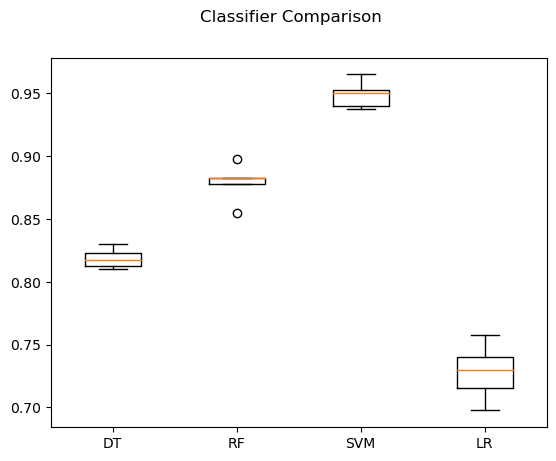

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection

import requests
import io


# DATASET_PATH = "dataset/mobile.csv"  # 본인이 mobile.csv를 저장한 경로를 입력합니다.
DATASET_PATH = "https://raw.githubusercontent.com/MyungKyuYi/AI-class/main/mobile.csv"

if __name__ == "__main__":
    mobile_dataset = pd.read_csv(DATASET_PATH)
    mobile_dataset['target'] = mobile_dataset['price_range']

    x_data = mobile_dataset.iloc[:, :20]
    y_data = mobile_dataset.iloc[:, [-1]]
    
    classifier_list = []
    classifier_list.append(("DT", DecisionTreeClassifier()))
    classifier_list.append(("RF", RandomForestClassifier()))
    classifier_list.append(("SVM", SVC()))
    classifier_list.append(("LR", LogisticRegression(max_iter=3000)))
    
    results = []
    names = []
    
    for name, classifier in classifier_list:
        kfold = model_selection.StratifiedKFold(n_splits=5, random_state=7, shuffle=True)
        cv_results = model_selection.cross_val_score(classifier, x_data, y_data.values.ravel(), cv=kfold, scoring="accuracy")

        print(name, ":", cv_results)
        results.append(cv_results)
        names.append(name)
            
    fig = plt.figure()

    fig.suptitle('Classifier Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()